<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [3]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


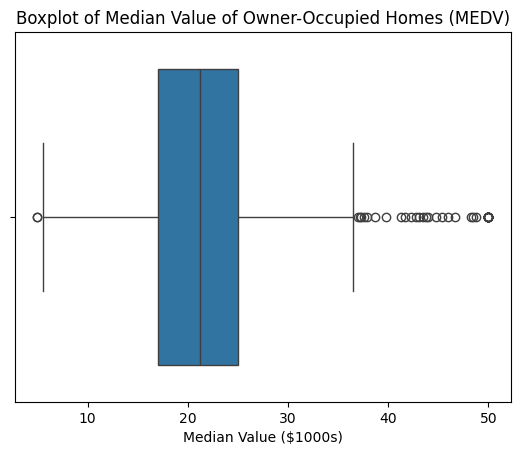

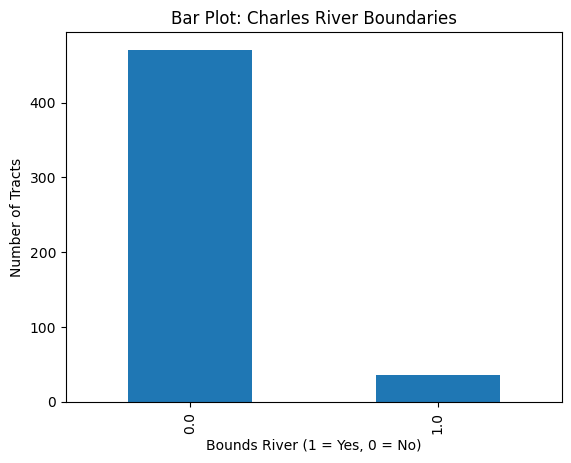

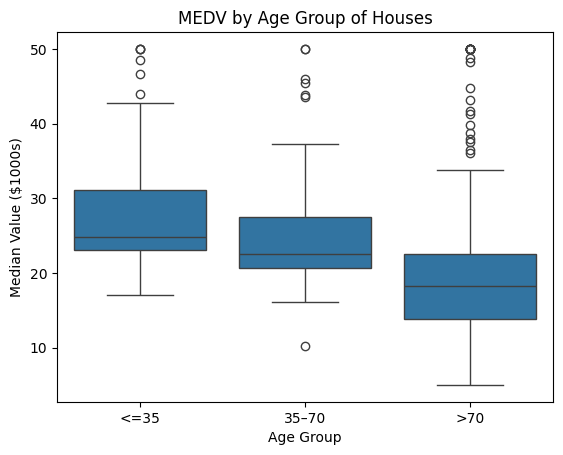

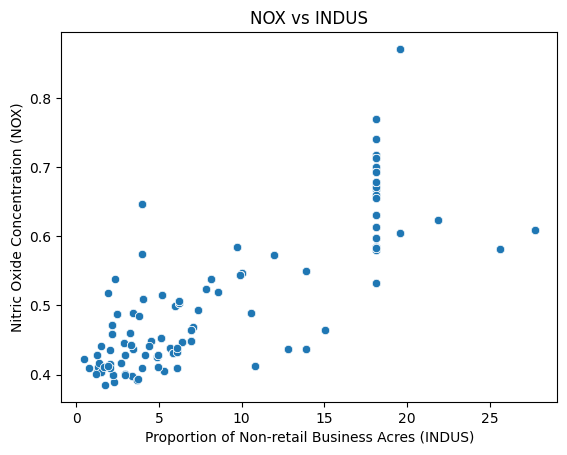

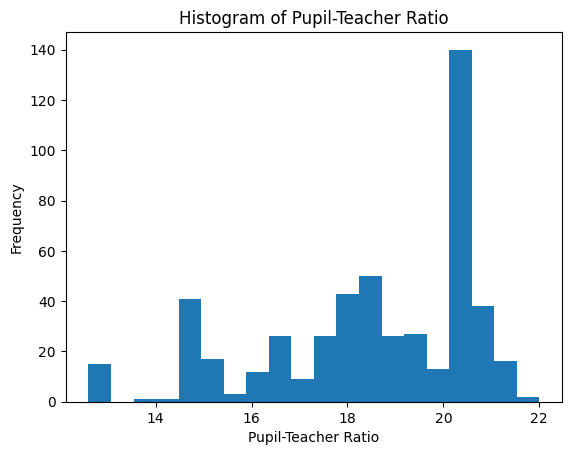

In [7]:
# Task 2: Descriptive Statistics and Visualizations

# 1. Boxplot for MEDV
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('Median Value ($1000s)')
plt.show()

# 2. Bar plot for CHAS
boston_df['CHAS'].value_counts().plot(kind='bar')
plt.title('Bar Plot: Charles River Boundaries')
plt.xlabel('Bounds River (1 = Yes, 0 = No)')
plt.ylabel('Number of Tracts')
plt.show()

# 3. Boxplot of MEDV vs AGE Group
bins = [0, 35, 70, 100]
labels = ['<=35', '35–70', '>70']
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
plt.title('MEDV by Age Group of Houses')
plt.xlabel('Age Group')
plt.ylabel('Median Value ($1000s)')
plt.show()

# 4. Scatter plot: NOX vs INDUS
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('NOX vs INDUS')
plt.xlabel('Proportion of Non-retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.show()

# 5. Histogram for PTRATIO
plt.hist(boston_df['PTRATIO'], bins=20)
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


In [8]:
# Task 3: Statistical Tests

# T-test for MEDV by CHAS
river_yes = boston_df[boston_df['CHAS'] == 1]['MEDV']
river_no = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_val = scipy.stats.ttest_ind(river_yes, river_no)
print("T-Test: MEDV vs CHAS")
print("T-Statistic:", t_stat)
print("P-Value:", p_val)

if p_val < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in MEDV based on CHAS.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference in MEDV based on CHAS.")


# ANOVA – MEDV across AGE Groups
group1 = boston_df[boston_df['AGE_Group'] == '<=35']['MEDV']
group2 = boston_df[boston_df['AGE_Group'] == '35–70']['MEDV']
group3 = boston_df[boston_df['AGE_Group'] == '>70']['MEDV']
f_stat, p_val = scipy.stats.f_oneway(group1, group2, group3)
print("\nANOVA: MEDV vs AGE Groups")
print("F-Statistic:", f_stat)
print("P-Value:", p_val)

if p_val < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in MEDV among the AGE groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference in MEDV among AGE groups.")


# Pearson Correlation between NOX and INDUS
corr, p_val = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("\nPearson Correlation: NOX vs INDUS")
print("Correlation Coefficient:", corr)
print("P-Value:", p_val)

if p_val < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant correlation between NOX and INDUS.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant correlation between NOX and INDUS.")


# Regression – DIS vs MEDV
X = boston_df[['DIS']]
X = sm.add_constant(X)
y = boston_df['MEDV']
model = sm.OLS(y, X).fit()
print("\nRegression Analysis: DIS vs MEDV")
print(model.summary())

p_value_dis = model.pvalues['DIS']
if p_value_dis < 0.05:
    print("Conclusion: Reject the null hypothesis. DIS significantly affects MEDV.")
else:
    print("Conclusion: Fail to reject the null hypothesis. DIS does not significantly affect MEDV.")



T-Test: MEDV vs CHAS
T-Statistic: 3.996437466090509
P-Value: 7.390623170519905e-05
Conclusion: Reject the null hypothesis. There is a significant difference in MEDV based on CHAS.

ANOVA: MEDV vs AGE Groups
F-Statistic: 36.40764999196599
P-Value: 1.7105011022702984e-15
Conclusion: Reject the null hypothesis. There is a significant difference in MEDV among the AGE groups.

Pearson Correlation: NOX vs INDUS
Correlation Coefficient: 0.7636514469209192
P-Value: 7.913361061210442e-98
Conclusion: Reject the null hypothesis. There is a significant correlation between NOX and INDUS.

Regression Analysis: DIS vs MEDV
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 20 Jul 2025   Prob (F-statistic):         